# ESQUEMAS DE MODULAÇÃO DIGITAL

# SUMÁRIO

1. Métodos de Modulação sem Memória

2. Esquemas de Sinalização com Memória

&emsp;&emsp; 2.1 Sinalizações CPFSK e CPM

3. Espectro de Potência de Sinais Modulados Digitalmente

&emsp;&emsp;  3.1 Densidade Espectral de Potência de Sistemas Modulados Digitalmente com Memória


&emsp;&emsp;&emsp;  3.1.1 Densidade Espectral de Potência de Sinais CPM e CPFSK




<a name = "PowerSpectrum"></a>
# 2. Esquemas de Sinalização com memória

### Modulações com Memória

Modulações com memória são aquelas em que o sinal transmitido depende não apenas do símbolo atual, mas também de símbolos anteriores. Esse comportamento pode ser modelado por **cadeias de Markov** ou **máquinas de estados finitos**, com transições de estado e saídas definidas por:

$$
m = f_m(S_{k-1}, I_k), \quad S_k = f_s(S_{k-1}, I_k)
$$

Onde:
- \( I_k \) é o símbolo de informação atual
- \( S_k \) é o estado atual
- \( m \) é o índice do sinal transmitido

---

### Exemplo: NRZ e NRZI

#### NRZ (Non-Return-to-Zero)
- Modulação **sem memória**
- Bit 1 → pulso retangular de amplitude \( +A \)
- Bit 0 → pulso retangular de amplitude \( -A \)

#### NRZI (Non-Return-to-Zero Inverted)
- Modulação **com memória**
- Transição de nível ocorre **somente** quando o bit transmitido é 1
- Codificação diferencial:

$$
b_k = a_k \oplus b_{k-1}
$$

Onde:
- \( a_k \) → entrada binária
- \( b_k \) → saída codificada
- \( \oplus \) → soma módulo 2

O estado atual \( b_k \) depende do estado anterior, formando uma cadeia de Markov com dois estados.

<a name = "PowerSpectrum"></a>
## 2.1 Sinalizações CPFSK e CPM

### CPFSK – Continuous Phase Frequency Shift Keying

O CPFSK é uma forma de modulação onde a **fase do sinal é contínua**, evitando saltos abruptos de frequência e reduzindo as **lóbulo laterais** no espectro.

#### Sinal PAM modulador:

$$
d(t) = \sum_{n} I_n \, g(t - nT)
$$

- $ I_n \in \{ \pm1, \pm3, \dots, \pm(M-1) \} $
-  g(t)  é o pulso retangular de amplitude $ \frac{1}{2T} $

#### Sinal equivalente passa-baixa:

$$
v(t) = \sqrt{\frac{2E}{T}} \, e^{j \left( 4\pi T f_d \int_{-\infty}^{t} d(\tau) \, d\tau + \phi_0 \right)}
$$

#### Sinal passabanda:

$$
s(t) = \sqrt{\frac{2E}{T}} \, \cos\left( 2\pi f_c t + \phi(t; I) + \phi_0 \right)
$$

#### Fase acumulada:

$$
\phi(t; I) = 4\pi T f_d \int_{-\infty}^{t} d(\tau) \, d\tau
= \sum_{n} I_n \cdot 4\pi T f_d \int_{-\infty}^{t} g(\tau - nT) \, d\tau
$$

Para $ t \in [nT, (n+1)T] $, a fase pode ser escrita como:

$$
\phi(t; I) = \theta_n + 2\pi h I_n q(t - nT)
$$

Onde:
- $ h = 2 f_d T $ é o índice de modulação
- $ \theta_n = \pi h \sum_{k=-\infty}^{n-1} I_k $ é a memória acumulada
- \( q(t) \) é a integral de \( g(t) \)

---

### CPM – Continuous Phase Modulation

O CPM generaliza o CPFSK. A fase do sinal é dada por:

$$
\phi(t; I) = 2\pi \sum_{k=-\infty}^{n} I_k h_k q(t - kT), \quad nT \le t \le (n+1)T
$$

- \( h_k \) → índice de modulação (fixo ou variável)
- $ q(t) = \int_{0}^{t} g(\tau) \, d\tau $

#### Tipos de CPM:
- **Full-response**: $ g(t) = 0 $ para $ t > T $
- **Partial-response**: $ g(t) \neq 0 $ para $ t > T $

A forma de $ g(t) $ determina a memória e a suavidade da fase.

#### Pulsos CPM Comuns

##### LREC – Rectangular Pulse

$$
g(t) = 
\begin{cases}
\frac{1}{2L T}, & 0 \le t \le L T \\
0, & \text{caso contrário}
\end{cases}
$$

- Pulso constante
- Para $ L = 1 $, equivale ao CPFSK

---

##### LRC – Raised Cosine Pulse

$$
g(t) = 
\begin{cases}
\frac{1}{2 L T} \left( 1 - \cos\left( \frac{2\pi t}{L T} \right) \right), & 0 \le t \le L T \\
0, & \text{caso contrário}
\end{cases}
$$

- Pulso suavizado
- Reduz componentes de alta frequência

---

##### GMSK – Gaussian Minimum Shift Keying

$$
g(t) = \frac{Q\left(2\pi B \left(t - \frac{T}{2}\right)\right) - Q\left(2\pi B \left(t + \frac{T}{2}\right)\right)}{\sqrt{\ln 2}}
$$

- $ Q(x) = \frac{1}{2} \, \mathrm{erfc}\left( \frac{x}{\sqrt{2}} \right) $
- \( B \) → largura de banda do pulso
- Pulso truncado em $ |t| \le 1.5T $ para aplicações práticas

<a name = "PowerSpectrum"></a>
# 3. Espectro de Potência de Sinais Modulados Digitalmente 

Nesta seção, será esutdado o cálculo de espectro de sinais modulados digitalmente com memória. Esse estudo é importante para determinar a banda necessária para a transmissão desses sinais e para saber a sua eficiência espectral. A priori, abordaremos o caso em que o sina a ser transmitido pode depender de todo o histórico de transmissão até o momento. A posteriori, trateremos dos casos em que o sistema posui uma memória finita, dos casos de modulação linear, e dos casos onde a modulação pode ser determinada por um espaço de estados de uma cadeia de Markov. Concluiremos a seção com o estudo dos casos de modulação de fase constante(CPM)

<a name = "3.1"></a>
## 3.1 Densidade Espectral de Potência de Sistemas Modulados Digitalmente com Memória

Consideremos um sinal modulado $v(t)$ possui um equivalente passa baixa $v_l(t)$ dado por:
$$
v_l(t) = \sum_{n = -\infty}^\infty s_l(t-nT, I_n) \tag{3.1}
$$
Onde $s_l(t, I_n)$ representa um dos M possíves sinais equivalentes passa-baixa, determinados pela sequência de informações em $n$ $I_n$, que é um processo estacionário. Para obter a densidade espectral de potência do sinal de RF, devemos primeiro encontrar  a densidade espectral de potência do equivalente passa-baixa. Assim, determinemos primeiramente a função de autocorrelação desse sinal:

\begin{align}
R_{v_l}(t + \tau, t) &= \mathbb{E} \left[ v_l(t + \tau)\,v_l^*(t) \right] \nonumber \\
&= \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\mathbb{E} \left[ s_l(t + \tau - nT;\, I_n)\, s_l^*(t - mT;\, I_m) \right] \tag{3.2}
\end{align}


Uma vez que $v_l(t)$ é um processo cicloestacionário, devemos calcular uma média de sua autocorrelação em um preíodo T. Assim, escrevemos:

$$
\bar{R}_{v_l}(\tau) = \frac{1}{T} \sum_{k=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\int_{0}^{T} \mathbb{E} \left[ s_l(t + \tau - mT - kT; I_{m+k})\,
s_l^*(t - mT; I_m) \right] dt 
$$

$$
{=} \frac{1}{T} \sum_{k=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\int_{-mT}^{-(m-1)T} \mathbb{E} \left[ s_l(u + \tau - kT; I_k)\,
s_l^*(u; I_0) \right] du
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} \int_{-\infty}^{\infty}
\mathbb{E} \left[ s_l(u + \tau - kT; I_k)\,
s_l^*(u; I_0) \right] du \tag{3.3}
$$

Definindo a função $g_k(\tau)$ como sendo a função de autocorrelação cruzada entre os k-ésimo e primeiro sinais em banda base, ou seja:

$$
g_k(\tau) = \int_{-\infty}^{\infty}E[s_l(t+\tau, I_k)s_l^*(t, I_0)] \tag{3.4}
$$

podemos escrever a densidade espectral de potência do sinal equivalente passa-baixo $S_{vl}(f)$ como sendo:

$$
S_{v_l}(f) = \frac{1}{T} \,\mathcal{F} \left[ \sum_{k=-\infty}^{\infty} g_k(\tau - kT) \right]
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} G_k(f) \,e^{-j2\pi k f T} \tag{3.5}
$$


Em que $G_{k}(f)$ é a transformada de Fourier da função $g_k(t)$. Espanindo a função $G_k(t)$, e após algum algebrismo, podemos reescrevê-la como:

$$
G_k(f) = E[S_l(f, I_k)S_l^*(f, I_0)] \tag{3.6}
$$

Em que $S_l(f, I_k)$ e $S_l(F, I_0)$ são as transformadas de Fourier de $s_l(t, I_k)$ e $s_l(t, I_0)$, respectivamente.

Se definirmos $G+k(f)' = G_k(f)-G_0(f)$, podemos reescrever s equação para o espectro de $v_l$ como:

$$
S_{v_l}(f) = \frac{1}{T} \sum_{k=-\infty}^{\infty} \left( G_k(f) - G_0(f) \right) e^{-j2\pi k f T}
+ \frac{1}{T} \sum_{k=-\infty}^{\infty} G_0(f) e^{-j2\pi k f T}
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} G'_k(f) \,e^{-j2\pi k f T}
+ \frac{1}{T^2} \sum_{k=-\infty}^{\infty} G_0(f)\, \delta \left( f - \frac{k}{T} \right) \tag{3.7}
$$

$$
= \frac{2}{T} \,\Re \left[ \sum_{k=1}^{\infty} G'_k(f) \,e^{-j2\pi k f T} \right]
+ \frac{1}{T^2} \sum_{k=-\infty}^{\infty} G_0 \left( \frac{k}{T} \right) \delta \left( f - \frac{k}{T} \right)
$$

Note que o espectro do sinal possui duas componentes, uma contínua e uma discreta em frequência

<a name = "PowerSpectrum"></a>
## 3.1.1  Espectro de Potência de Sinais CPM e CPFSK

### Modelo do Sinal CPM
O sinal passabanda é dado por:

$$
s(t; I) = A \cos\left[ 2\pi \mathrm{f_c} \, t + \phi(t; I) \right]
$$

com fase:

$$
\phi(t; I) = 2\pi h \sum_{k=-\infty}^{\infty} I_k \, q(t - kT)
$$

Onde:
- $h$ → índice de modulação  
- $I_k$ → símbolos da constelação ($\pm 1, \pm 3, \dots, \pm (M-1)$)  
- $q(t)$ → resposta ao impulso da fase (integral do pulso de frequência $g(t)$)  
- $T$ → duração do símbolo  
- $L$ → comprimento do pulso em múltiplos de $T$

---

### Função de Autocorrelação
Considerando o sinal equivalente em banda base:

$$
v_l(t) = e^{j\phi(t; I)}
$$

A função de autocorrelação é:

$$
R_{v_l}(t+\tau; t) = E \left[ \exp\left( j 2\pi h \sum_{k=-\infty}^{\infty} I_k \left[ q(t+\tau - kT) - q(t - kT) \right] \right) \right]
$$

Devido à independência estatística dos símbolos $I_k$, o termo se separa em um produto de expectativas.

---

### Função Característica
Define-se a **função característica** da sequência de símbolos:

$$
I(h) = E\left[ e^{j\pi h I_k} \right] = \sum_{n} P_n \, e^{j\pi h n}
$$

Para símbolos igualmente prováveis ($P_n = 1/M$):

$$
I(h) = \frac{\sin(M\pi h)}{M \, \sin(\pi h)}
$$

---

### Forma Geral da PSD
A **densidade espectral de potência** é obtida pela transformada de Fourier da autocorrelação média:

$$
S_{v_l}(f) = \int_{-\infty}^{\infty} \bar{R}_{v_l}(\tau) \, e^{-j 2\pi f \tau} \, d\tau
$$

Após manipulações (separando o intervalo $0 \le \tau < LT$ e $\tau \ge LT$), obtém-se:

$$
S_{v_l}(f) = 2 \, \mathrm{Re} \left[ \int_{0}^{LT} \bar{R}_{v_l}(\tau) \, e^{-j 2\pi f \tau} \, d\tau \right]
+ \frac{ \int_{LT}^{(L+1)T} \bar{R}_{v_l}(\tau) \, e^{-j 2\pi f \tau} \, d\tau }
{ 1 - I(h) \, e^{-j 2\pi f T} }
$$

Essa expressão é válida para $|I(h)| < 1$.  
Quando $|I(h)| = 1$, aparecem **componentes discretos** (impulsos de Dirac) na PSD.

---

### Caso CPFSK com Pulso Retangular
Para **CPFSK** com pulso $g(t)$ retangular no intervalo $[0, T]$, $q(t)$ é linear em $[0, T]$.  
Nesse caso, a PSD admite forma fechada:

$$
S_v(f) = T \left[ \frac{1}{M} \sum_{n=1}^{M} A_n^2(f) \;+\; \frac{2}{M^2} \sum_{n=1}^{M} \sum_{m=1}^{M} B_{nm}(f) \, A_n(f) \, A_m(f) \right]
$$

onde:

$$
A_n(f) = \frac{\sin\left[ \pi \left( fT - \frac{1}{2}(2n - 1 - M)h \right) \right]}
{\pi \left( fT - \frac{1}{2}(2n - 1 - M)h \right)}
$$

$$
B_{nm}(f) = \frac{\cos(2\pi f T - \alpha_{nm}) - \cos(\alpha_{nm})}
{1 + \rho(h) - 2\cos(2\pi f T)}
$$

$$
\alpha_{nm} = \pi h (m + n - 1 - M)
$$

$$
\rho(h) = \frac{\sin(M\pi h)}{M \, \sin(\pi h)}
$$

I: [-1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1
  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  1
  1  1]


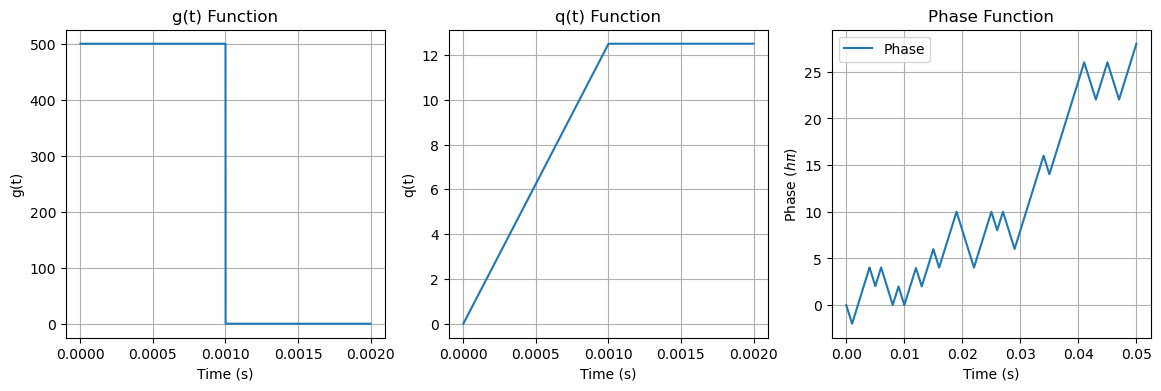

In [ ]:
import numpy as np
from scipy.integrate import cumulative_trapezoid as cumtrapz
from matplotlib import pyplot as plt
from scipy.signal import welch
from scipy.special import erfc

np.random.seed(42)

N = 100
A = 10 # Amplitude do sinal
f_c = 10**3 # Frequência da portadora
f_s = 10**5 # Frequência de amostragem
T = N/f_s
L = 1  # Fator de duração do pulso
h = [0.3, 0.5, 0.8]  # Índice de modulação
size_message = 50

I = np.random.choice([-1, 1], size=size_message)

print("I:", I)

# Tempo total de tranmissão
t = np.linspace(0, T*size_message, size_message*N, endpoint=False)

#Tempo de pulso
t_2 = np.linspace(0, 2*L*T, size_message*N, endpoint=False)

def LRC(t, T, L):
    """    Function to compute the LRC (Raised Cosine) pulse shape.
    Args:
        t (numpy.ndarray): Time vector.
        T (float): Symbol period.
        L (int): Roll-off factor."""
    
    return np.where((t>= 0) & (t<=L*T), (1/(2*L*T))*(1-np.cos((2*np.pi * t)/(L*T))), 0)

def LREC(t, T, L):
    """    Function to compute the LREC (Raised Exponential Cosine) pulse shape.
    Args:
        t (numpy.ndarray): Time vector.
        T (float): Symbol period.
        L (int): Roll-off factor."""
    
    return np.where((t >= 0) & (t <= L*T), (1/(2*L*T)), 0.0)

def Q(x):
    """Função Q(x) baseada em erfc."""
    return 0.5 * erfc(x / np.sqrt(2))

def gmsk_pulse(t, BT, T=1):
    """Calcula o pulso GMSK g(t) para um dado BT."""
    B = BT / T
    a = 2 * np.pi * B * (t - T/2)
    b = 2 * np.pi * B * (t + T/2)
    return (Q(a) - Q(b)) / np.sqrt(np.log(2))


g_t = LREC(t_2, T, L)
q_t = cumtrapz(g_t, dx=1/f_s, initial=0)

g_sample = np.zeros_like(t)
q_sample = np.zeros_like(t)
phase = np.zeros_like(t)
v_l = np.zeros_like(t, dtype=complex)  

for i in h:
    for k in range(size_message):
        g_sample = LREC(t - k*T, T, L)
        q_sample = cumtrapz(g_sample, dx=1/f_s, initial=0)
        phase += 2*np.pi * I[k] * i *q_sample

    
    phase_hpi = phase/(i*np.pi)

    # Cálculo do equivalente passa-baixa de acordo com a equação 3.1
    v_l = np.exp(1j * phase)    #Equivalente passa-baixa
    
    # Sinal em RF 
    v_t = A*np.cos(2*np.pi * f_c * t + phase)   #   
    #v_t = np.real(v_l*np.exp(1j * 2 * np.pi * f_c * t))  

fig, axs = plt.subplots(1, 3, figsize=(14,4))

# Pulso LRC g(t)
axs[0].plot(t_2, g_t, label='g(t)')
axs[0].set_title('g(t) Function')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('g(t)')
axs[0].grid(True)

# Função integral q(t)
axs[1].plot(t_2, q_t, label='q(t)')
axs[1].set_title('q(t) Function')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('q(t)')
axs[1].grid(True)

# Função de fase ϕ(t)
axs[2].plot(t, phase_hpi, label='Phase')
axs[2].set_title('Phase Function')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel(r'Phase ($h\pi$)')
axs[2].grid(True)
axs[2].legend()

plt.show()


In [2]:
def CPM_phase(t, T, h, I, pulse_name = "LREC", L = 2, BT = 0.5):
    """Cálculo da fase do sinal modulante equivalente passa-baixas para diferentes pulsos.
    
    Args:
        t (np.ndarray): Vetor de tempo.
        T (float): Período de símbolo.
        h (float): Índice de modulação.
        pulse_name: Pulso a ser utilizado, pode ser: LREC, LRC, GMSK
        L: Fator de duração dos pulsos LREC ou LRC
        BT: duração do pulso GMSK
    """

    dt = t[1] - t[0]
    size_message = len(I)

    name = pulse_name.strip().upper()
    phase = np.zeros_like(t)
    if name == "LREC":
        for k in range(size_message):
            g_sample = LREC(t - k*T, T, L)
            q_sample = cumtrapz(g_sample, dx=1/f_s, initial=0)
            phase += 2*np.pi * I[k] * i *q_sample
    elif name == "LRC":
        for k in range(size_message):
            g_sample = LRC(t - k*T, T, L)
            q_sample = cumtrapz(g_sample, dx=1/f_s, initial=0)
            phase += 2*np.pi * I[k] * i *q_sample
    elif name == "GMSK":
        for k in range(size_message):
            g_sample = gmsk_pulse(t - k*T, BT, T)
            q_sample = cumtrapz(g_sample, dx=1/f_s, initial=0)
            phase += 2*np.pi * I[k] * i *q_sample
    else:
        raise ValueError("Pulso não reconhecido. Use 'LREC', 'LRC' ou 'GMSK'.")
    
    return phase

def CPM_lowpass(phase, A=1):
    """
    Function that computes the low-pass equivalent for CPM

    Args:
        A (float): Amplitude of the signal
        phase (array-like): Phase of the low-pass equivalent

    Returns:
        v_l (complex): Low-pass equivalent for CPM
    """
    return A * np.exp(1j * phase)


def CPM_rf(f_c, t, phase, A=1):
    """
    Function that computes the RF signal for CPM

    Args:
        A (float): Amplitude of the signal
        f_c (float): Carrier frequency
        t (array-like): Time vector
        phase (array-like): Low-pass equivalent's phase vector

    Returns:
        array-like: RF signal
    """
    if len(t) != len(phase):
        raise ValueError("Vetor de tempo e de fase precisam ter mesmo tamanho")

    return A * np.cos(2 * np.pi * f_c * t + phase)


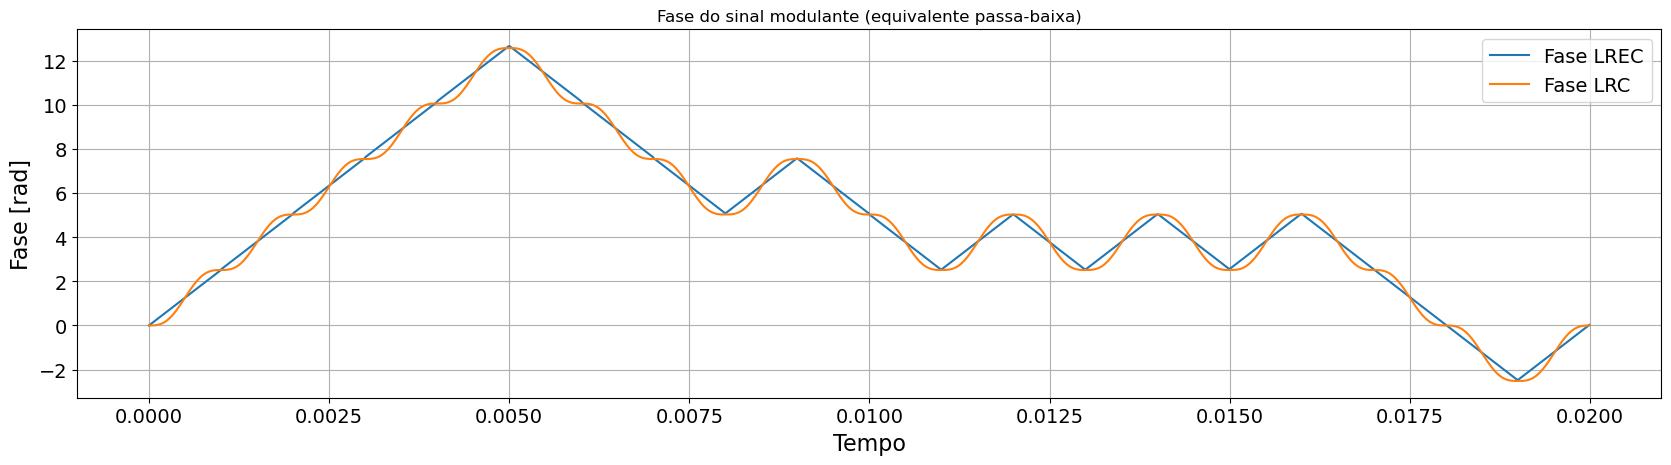

In [6]:
# Parâmetros
BT = 0.5
L = 1
size_message = 20
T = 0.001
h = 0.5

# Mensagem aleatória (+1 ou -1)
I = np.random.choice([-1, 1], size=size_message)

# Vetor de tempo
t = np.linspace(0, T * size_message, size_message * 100, endpoint=False)

# Fases para diferentes formatos de CPM
phase_lrec = CPM_phase(t, T, h, I, "LREC", L = L)
phase_lrc = CPM_phase(t, T, h, I, "LRC", L = L)
phase_gaussian = CPM_phase(t, T, h, I, "GMSK", BT = BT)

# Equivalente passa-baixa
vl_lrec = CPM_lowpass(phase_lrec)
vl_lrc = CPM_lowpass(phase_lrc)
vl_gauss = CPM_lowpass(phase_gaussian)

# Sinal RF
vt_lrec = CPM_rf(200, t, phase_lrec)
vt_lrc = CPM_rf(200, t, phase_lrc)
vt_gauss = CPM_rf(200, t, phase_gaussian)

# Plotagem
plt.figure(figsize=(17, 13))

# --- Fase ---
plt.subplot(3, 1, 1)
plt.plot(t, phase_lrec, label='Fase LREC')
plt.plot(t, phase_lrc, label='Fase LRC')
#plt.plot(t, phase_gaussian, label='Fase GMSK')
plt.title('Fase do sinal modulante (equivalente passa-baixa)')
plt.xlabel('Tempo', fontsize = 16)
plt.ylabel('Fase [rad]', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid(True)

'''# --- Equivalente passa-baixa ---
plt.subplot(3, 1, 2)
plt.plot(t, np.real(vl_lrec), label='Re{LREC}')
plt.plot(t, np.real(vl_lrc), label='Re{LRC}')
#plt.plot(t, np.real(vl_gauss), label='Re{GMSK}')
plt.title('Sinal equivalente passa-baixa (parte real)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# --- Sinal RF ---
plt.subplot(3, 1, 3)
plt.plot(t, vt_lrec, label='RF LREC')
plt.plot(t, vt_lrc, label='RF LRC')
#plt.plot(t, vt_gauss, label='RF GMSK')
plt.title('Sinal em RF')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)'''
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.show()

In [7]:
print(I)

[ 1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1]


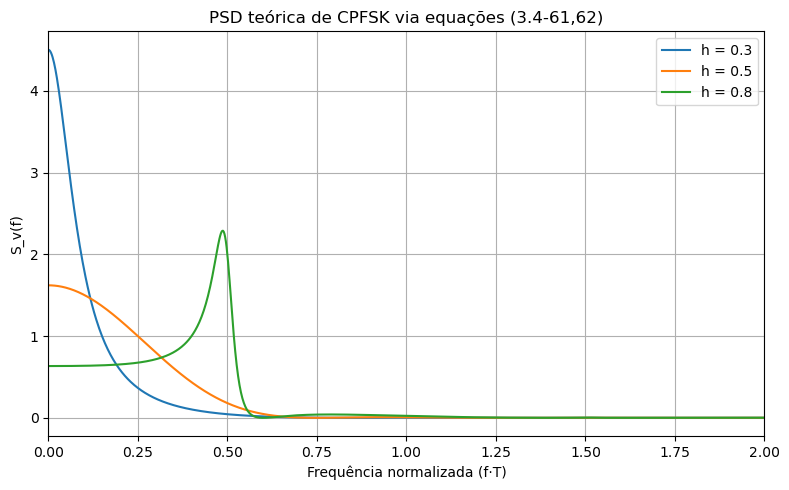

In [4]:
import numpy as np
import matplotlib.pyplot as plt


M      = 2              # Ordem da modulação (número de símbolos na duração do pulso)
h_list = [0.3, 0.5, 0.8]  # índices de modulação
T      = 1.0            # tempo de símbolo 

# Eixo de frequência normalizada f·T
x = np.linspace(-2, 2, 2001)  # de –2 a 2 em passos de 0.002
f = x / T                     # frequência real = x / T (se precisar)

def SDP_CPFSK(x, M, h, T):
    """
    Calcula S_v(f) para um dado h via equações (3.4-61) e (3.4-62).
    x : array de f·T
    M : número de símbolos
    h : índice de modulação
    T : tempo de símbolo
    """
    # Phi(h)
    Phi = np.sin(M * np.pi * h) / (M * np.sin(np.pi * h))
    
    # deslocamentos para A_n: d_n = ½·(2n–1–M)·h
    d = np.array([0.5 * ((2*n - 1 - M) * h) for n in range(1, M+1)])
    
    # A_n(x)
    # np.sinc(y) = sin(pi·y) / (pi·y)
    A = np.array([np.sinc(x - dn) for dn in d])  # shape (M, len(x))
    
    # Soma principal: inicializa com o termo ∑ A_n^2
    term1 = (1/M) * np.sum(A**2, axis=0)
    
    # Termo duplo: ∑_{n=1}^M ∑_{m=1}^M B_nm · A_n · A_m
    term2 = np.zeros_like(x)
    for n in range(M):
        for m in range(M):
            alpha_nm = np.pi * h * ( (n+1) + (m+1) - 1 - M )
            num = np.cos(2*np.pi*x - alpha_nm) - Phi * np.cos(alpha_nm)
            den = 1 + Phi**2 - 2*Phi*np.cos(2*np.pi*x)
            B_nm = num / den
            term2 += B_nm * A[n] * A[m]
    term2 *= 2/(M**2)
    
    # S_v(f)
    Sv = T * (term1 + term2)
    return Sv

# Plotando S_v(f) para cada h
plt.figure(figsize=(8,5))
for h in h_list:
    Sv = SDP_CPFSK(x, M, h, T)
    plt.plot(x, Sv, label=f'h = {h}')

plt.xlim(0, 2)
plt.xlabel('Frequência normalizada (f·T)')
plt.ylabel('S_v(f)')
plt.title('PSD teórica de CPFSK via equações (3.4-61,62)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
